In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import classification_report


## Loading the data

In [287]:
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Visualization of data

Benign 212
Malignanat 357


c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


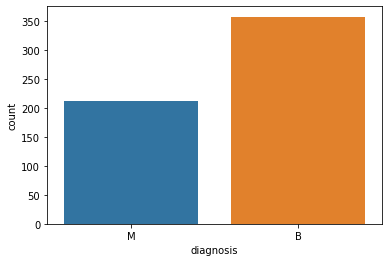

In [288]:
visual=sns.countplot(data['diagnosis'],label='Count')
M,B=data['diagnosis'].value_counts()
print("Benign",B)
print("Malignanat",M)

## Preprocesing of data

In [289]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [290]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [291]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [292]:
x=data.iloc[:,2:]
y=data.iloc[:,1]
# replacing M with 1 and B with 0
y=np.where(y=='M',1,0)


In [293]:
x=np.array(x)
y=np.array(y)


## splitting of data

In [294]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Feature scalling

In [295]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the Model

In [296]:
model=Sequential()
#adding input and first hidden layer
model.add(Dense( units = 16 , activation = 'relu' , input_shape = (30,)))
#adding second hidden layer
model.add(Dense( units = 30 , activation = 'relu' ))
#adding output layer
model.add(Dense( units = 1 , activation = 'sigmoid' ))

In [297]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_53 (Dense)             (None, 30)                510       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 31        
Total params: 1,037
Trainable params: 1,037
Non-trainable params: 0
_________________________________________________________________


In [298]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [299]:
model.fit(x = x_train, y = y_train, batch_size=100 , epochs=130 ,shuffle = True , verbose=2)

Epoch 1/130
5/5 - 1s - loss: 0.6703 - accuracy: 0.5582
Epoch 2/130
5/5 - 0s - loss: 0.6035 - accuracy: 0.7341
Epoch 3/130
5/5 - 0s - loss: 0.5441 - accuracy: 0.8308
Epoch 4/130
5/5 - 0s - loss: 0.4902 - accuracy: 0.8703
Epoch 5/130
5/5 - 0s - loss: 0.4425 - accuracy: 0.8945
Epoch 6/130
5/5 - 0s - loss: 0.3996 - accuracy: 0.9143
Epoch 7/130
5/5 - 0s - loss: 0.3602 - accuracy: 0.9275
Epoch 8/130
5/5 - 0s - loss: 0.3253 - accuracy: 0.9319
Epoch 9/130
5/5 - 0s - loss: 0.2953 - accuracy: 0.9341
Epoch 10/130
5/5 - 0s - loss: 0.2687 - accuracy: 0.9341
Epoch 11/130
5/5 - 0s - loss: 0.2465 - accuracy: 0.9363
Epoch 12/130
5/5 - 0s - loss: 0.2279 - accuracy: 0.9385
Epoch 13/130
5/5 - 0s - loss: 0.2121 - accuracy: 0.9385
Epoch 14/130
5/5 - 0s - loss: 0.1984 - accuracy: 0.9407
Epoch 15/130
5/5 - 0s - loss: 0.1868 - accuracy: 0.9429
Epoch 16/130
5/5 - 0s - loss: 0.1763 - accuracy: 0.9451
Epoch 17/130
5/5 - 0s - loss: 0.1670 - accuracy: 0.9473
Epoch 18/130
5/5 - 0s - loss: 0.1589 - accuracy: 0.9495
E

## testing the model

In [300]:
prediction=model.predict(x_test)
prediction=(prediction > 0.5)

In [303]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.94      0.97      0.96        33

    accuracy                           0.97       114
   macro avg       0.96      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [301]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)

<AxesSubplot:>

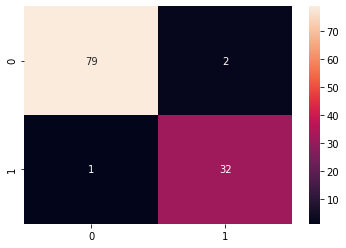

In [302]:
sns.heatmap(cm,annot=True)

